In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

#### Importing all the necessary libraries.

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)

#### Importing the excel file and  since the data is in the 1st sheet, I have mentioned sheet_name=1.

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape

(3999, 12)

# EDA

In [5]:
newdf=df.drop(['ID#'],axis=1)

### As the ID name doesn't add any value in model building we are dropping this column.

In [6]:
newdf.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
newdf.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### Checking for null values

In [8]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [9]:
newdf.shape

(3999, 11)

Balance


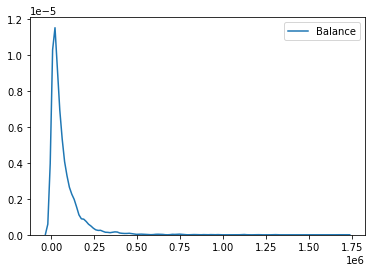

Qual_miles


C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


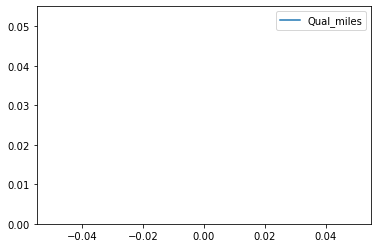

cc1_miles


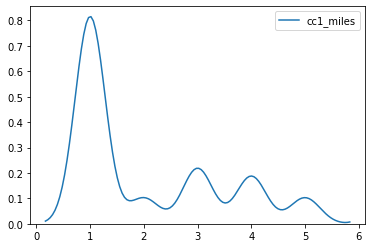

cc2_miles


C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


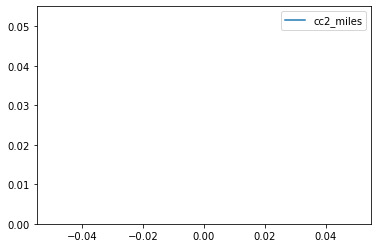

cc3_miles


C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


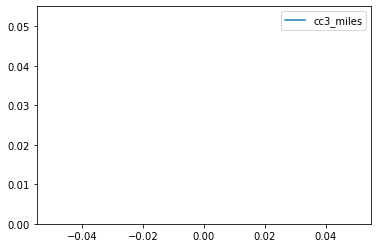

Bonus_miles


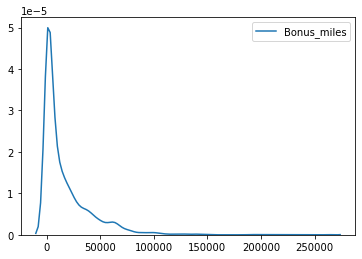

Bonus_trans


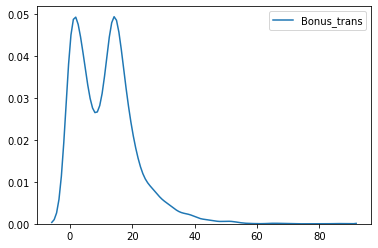

Flight_miles_12mo


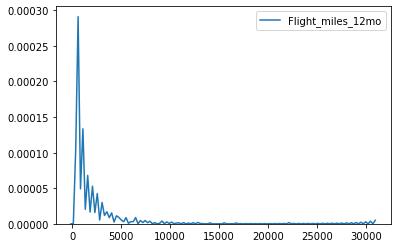

Flight_trans_12


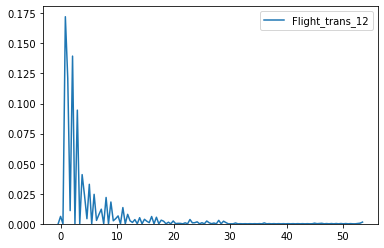

Days_since_enroll


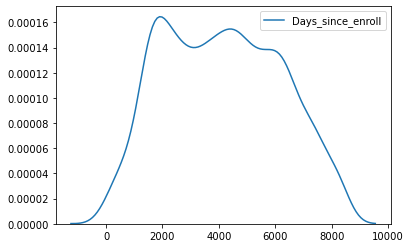

Award?


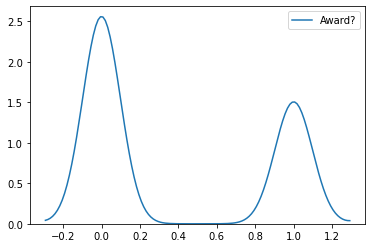

In [10]:
for i in newdf.columns:
    print(i)
    sns.kdeplot(newdf[i])
    plt.show()

### Creating a for loop on every feature to check for their distribution.

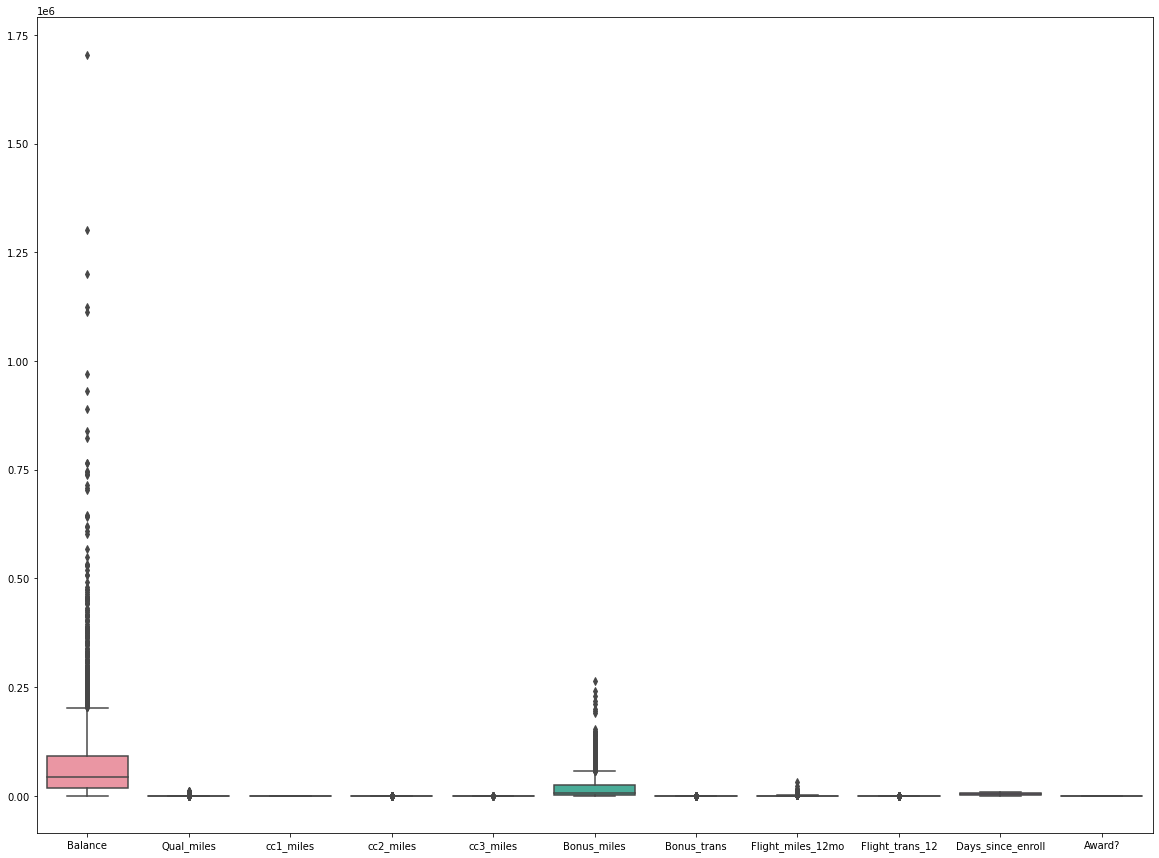

In [11]:
plt.figure(figsize=(20,15))
sns.boxplot(data=newdf)

### Using box plot we check for the outliers.

In [12]:
newdf.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Feature Scaling

In [13]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [14]:
df_norm=norm_func(df.iloc[:,1:])
df_norm.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


# Skree plot or Elbow curve

In [15]:
k=list(range(2,10))
k
TWSS=[]
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),'euclidean')))
    TWSS.append(sum(WSS))
        

### Creating elbow curve to find out the no. of clusters.

([<matplotlib.axis.XTick at 0x1c6c59b29a0>,
 <a list of 8 Text major ticklabel objects>)

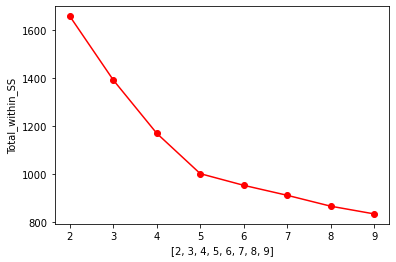

In [16]:
plt.plot(k,TWSS, 'ro-')
plt.xlabel(k)
plt.ylabel("Total_within_SS")
plt.xticks(k)

### We see that after n=5 there is no sharpe decrease in Total within SS.Hence the no. of clusters=5

In [17]:
model=KMeans(n_clusters=5)
model.fit(df_norm)

KMeans(n_clusters=5)

### Creating K Means cluster and fitting it to the normalised data.

In [18]:
model.labels_

array([4, 4, 4, ..., 1, 2, 2])

In [19]:
md=pd.Series(model.labels_)

In [20]:
df['clust']=md

In [21]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [22]:
df.sort_values(by='clust', ascending=True)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
1067,1078,146014,0,4,1,1,26366,17,700,3,5822,0,0
2797,2819,66716,0,3,1,1,22571,16,200,1,2082,0,0
1819,1836,30664,0,3,1,1,21242,22,700,5,4268,0,0
2808,2830,76909,0,3,1,1,18405,12,0,0,2066,0,0
1817,1834,75112,0,4,1,1,35532,14,500,1,4271,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,1388,5824,0,1,1,1,0,0,0,0,5401,0,4
1376,1389,17587,0,1,1,1,17587,7,0,0,5367,0,4
1377,1390,1000,0,1,1,1,0,0,0,0,5367,0,4
1368,1381,1000,0,1,1,1,0,0,0,0,4769,0,4


# INFERENCE


kmeans.cluster_centers_

In [23]:
df1=df.iloc[:,1:].groupby(['clust']).mean()

In [24]:
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
2,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
3,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0


In [25]:
df2=pd.DataFrame(np.arange(0,5),columns=['ClusterID'])

In [26]:
df2

,ClusterID
0,0
1,1
2,2
3,3
4,4


In [27]:
frame=[df1,df2]

In [28]:
df3=pd.concat(frame,axis=1)

In [29]:
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
0,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,0
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,1
2,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,2
3,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,3
4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,4


## Creating bar plot on different features and the cluster ID.

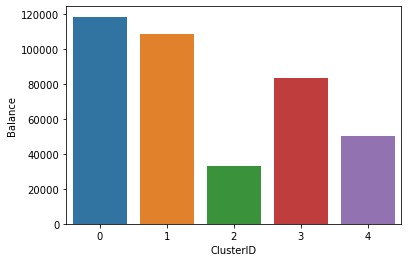

In [30]:
sns.barplot(data=df3,x='ClusterID',y='Balance')##Number of miles eligible for award travel


In [31]:
##Cluster 0 has the highest balance followed by cluster 2 and cluster 1 

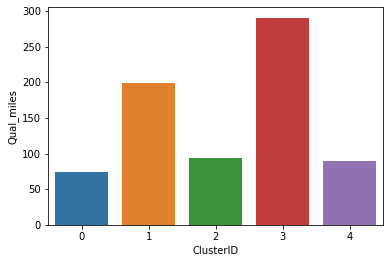

In [32]:
sns.barplot(data=df3,x='ClusterID',y='Qual_miles')##Number of miles counted as qualifying for Topflight status


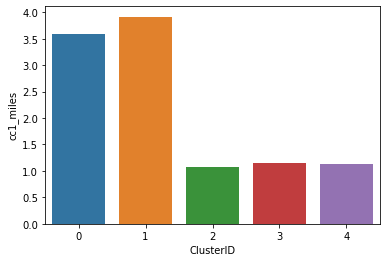

In [33]:
sns.barplot(data=df3,x='ClusterID',y='cc1_miles')##Number of miles earned with freq. flyer credit card in the past 12 months:



In [34]:
##cluster 0 and cluster 2 has earned the most miles from flyer credit card.

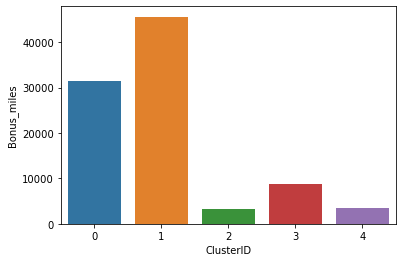

In [35]:
sns.barplot(data=df3,x='ClusterID',y='Bonus_miles')
##Number of miles earned from non-flight bonus transactions in the past 12 months

In [36]:
## Cluster 2 has earned the most non flight bonus as they are frequent travelers, customers from this cluster has been targeted so 
## they travel more which inturn increases the business of this airline.

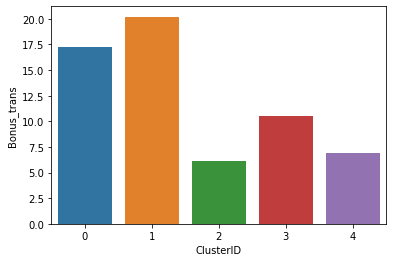

In [37]:
sns.barplot(data=df3,x='ClusterID',y='Bonus_trans')##Number of non-flight bonus transactions in the past 12 months


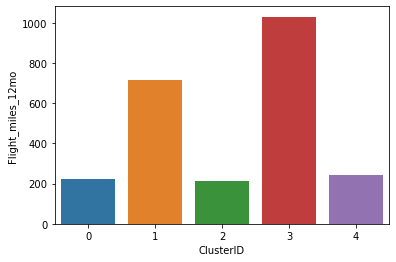

In [38]:
sns.barplot(data=df3,x='ClusterID',y='Flight_miles_12mo')##Number of flight miles in the past 12 months


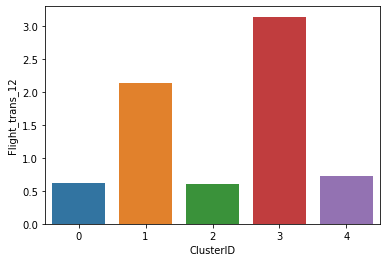

In [39]:
sns.barplot(data=df3,x='ClusterID',y='Flight_trans_12')##Number of flight transactions in the past 12 months


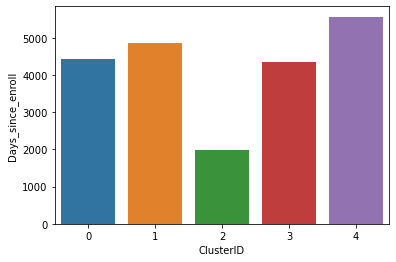

In [40]:
sns.barplot(data=df3,x='ClusterID',y='Days_since_enroll')##Number of days since Enroll_date


# INFERENCE

### From the above bar plots we analyze that Cluster 1 and 3 has the highest flight transaction in the past 12 months and although cluster 0 has the highest balance and more non flight bonus transactions their flight miles are low and maybe customers from this cluster are elite travelers and wish to travel on a top flight status so cluster 0 should be given more qual miles and check if that increases the flight miles.Non flight bonus should be given to cluster 3 and not cluster 0 as non flight bonus has no impact on the flight transactions of cluster 0 and as flight miles of cluster 1 is high, giving them non bonus flight might increase their flight transaction to a further extent.Cluster 4 has been enrolled from a very long time but is not given any bonus and has the least balance so we can target this cluster for a non flight bonus and see if taht increases their flight transactions. Award travels are given for cluster 1 and 3 as customers from this cluster frequent travelers and free traveling is given to these so it keeps the business going.

# Hierarchial Clustering

In [43]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


# Create Dendrogram

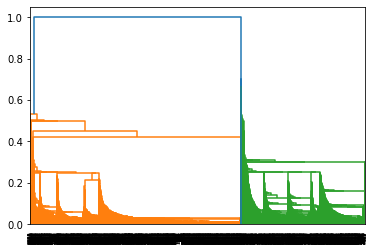

In [44]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

# Create Clusters

In [47]:
hc= AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [48]:
y_hc=hc.fit_predict(df_norm)

In [49]:
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [50]:
clusters

,clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [54]:
clusters

,clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [63]:
df3=df.copy()

In [66]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [64]:
df3['clust']=clusters

In [65]:
df3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [68]:
df4=df3.iloc[:,1:].groupby(['clust']).mean()

In [73]:
df5=pd.DataFrame(np.arange(0,4),columns=['ClusterID'])

In [74]:
frame=[df4,df5]

In [75]:
df6=pd.concat(frame,axis=1)

In [76]:
df6

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
0,97070.248817,240.183232,2.663962,1.015551,1.018256,28760.204868,15.742394,837.403651,2.565247,4629.066261,1.0,0
1,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1
2,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0,2
3,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1.0,3


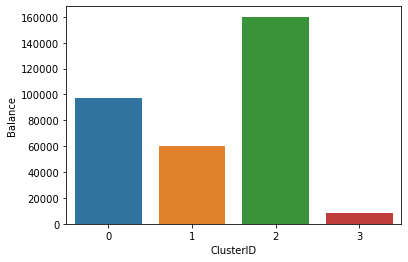

In [80]:
sns.barplot(data=df6,x='ClusterID',y='Balance')##Number of miles eligible for award travel


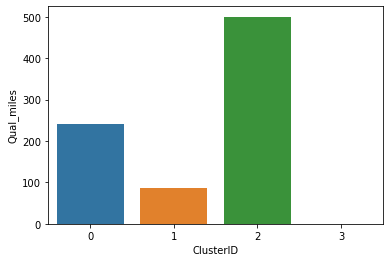

In [81]:
sns.barplot(data=df6,x='ClusterID',y='Qual_miles')##Number of miles counted as qualifying for Topflight status

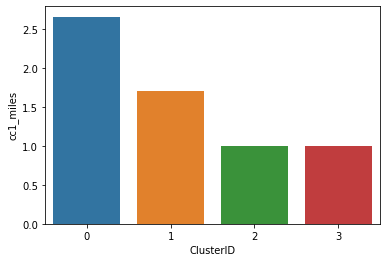

In [82]:
sns.barplot(data=df6,x='ClusterID',y='cc1_miles')##Number of miles earned with freq. flyer credit card in the past 12 months:

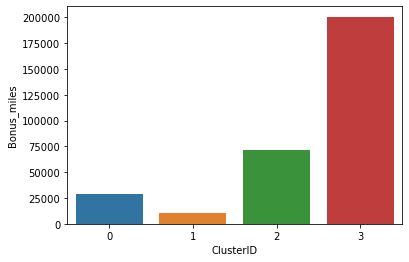

In [83]:
sns.barplot(data=df6,x='ClusterID',y='Bonus_miles')
##Number of miles earned from non-flight bonus transactions in the past 12 months

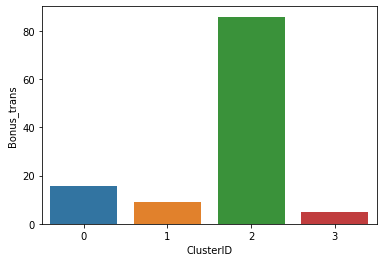

In [86]:
sns.barplot(data=df6,x='ClusterID',y='Bonus_trans')##Number of non-flight bonus transactions in the past 12 months

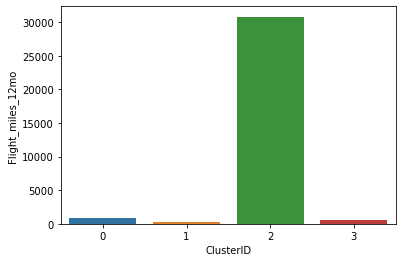

In [87]:
sns.barplot(data=df6,x='ClusterID',y='Flight_miles_12mo')##Number of flight miles in the past 12 months

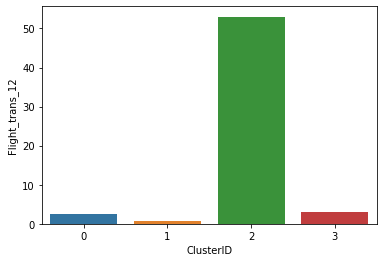

In [88]:
sns.barplot(data=df6,x='ClusterID',y='Flight_trans_12')##Number of flight transactions in the past 12 months

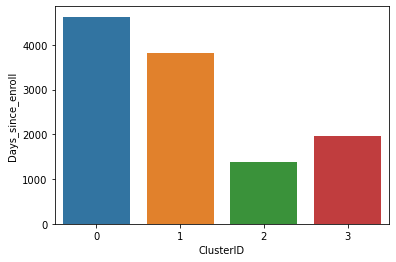

In [89]:
sns.barplot(data=df6,x='ClusterID',y='Days_since_enroll')##Number of days since Enroll_date

### From the above bar plots we observe that cluster 0 and cluster 1 were enrolled for this program from a long time and yet they have the least flight transactions which means they have been inactive. So to keep the business going we can provide them nonflight bonus to check if that has any impact on the flight transactions. Giving the non flight bonus to cluster 3 has no impacton the flight transactions so we can quit giving cluster 3 that benefit. Qual miles can be given to cluster 3 to check if thatincreases their flight transactions. Award travel is given to cluster 0, 2 and 3 because have the highest flight miles compared tocluster 1.